$$
\textbf{\Large Dans ce document, nous allons essayer de répondre}\\ 
\textbf{\Large aux questions en utilisant les données} \\
\textbf{\Large extraites à partir du web scrapping.}\\
\textbf{\LARGE LET'S GOO⬇🗽}
$$

In [226]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## **Importation des donnees de la Premier League de l'année 2020-2021**

- #### **Pour les joueurs**

In [227]:
appearances = pd.read_csv('./DATAS/appearances.csv')
assists = pd.read_csv('./DATAS/assists.csv')
big_chances_missed = pd.read_csv('./DATAS/big_chances_missed.csv')
clean_sheets = pd.read_csv('./DATAS/clean_sheets.csv')
clearances = pd.read_csv('./DATAS/clearances.csv')
dispossess = pd.read_csv('./DATAS/dispossess.csv')
goals = pd.read_csv('./DATAS/goals.csv')
high_claim = pd.read_csv('./DATAS/high_claims.csv')
hit_woodworks = pd.read_csv('./DATAS/hit_woodworks.csv')
minutes = pd.read_csv('./DATAS/minutes.csv')
off_lines = pd.read_csv('./DATAS/off_lines.csv')
offsides = pd.read_csv('./DATAS/offsides.csv')
own_goals = pd.read_csv('./DATAS/own_goals.csv')
passes = pd.read_csv('./DATAS/passes.csv')
penalty_saves = pd.read_csv('./DATAS/penalty_saves.csv')
punches = pd.read_csv('./DATAS/punches.csv')
red_cards = pd.read_csv('./DATAS/red_cards.csv')
saves = pd.read_csv('./DATAS/saves.csv')
shots = pd.read_csv('./DATAS/shots.csv')
tackles = pd.read_csv('./DATAS/tackles.csv')
touches = pd.read_csv('./DATAS/touches.csv')
yellow_cards = pd.read_csv('./DATAS/yellow_cards.csv')

dataframes = [appearances, assists, big_chances_missed, clean_sheets, clearances, dispossess, goals, high_claim,
              hit_woodworks, minutes, off_lines, offsides, own_goals, passes, penalty_saves, punches, red_cards,
              saves, shots, tackles, touches, yellow_cards]

Suppression de la colonne **Rank**.  
Cette colonne ne nous interesse pas car un joueur peut être premier dans le classement des joueurs et être 8 ème sur le classement des passeurs.

In [228]:
for data in dataframes:
    data.drop(columns='Rank', inplace=True)

Renommer les colonnes stats de chaque dataframe au stat correspondant

In [229]:
appearances.rename(columns={'Stat':'Appearances'}, inplace=True)
assists.rename(columns={'Stat':'Assists'}, inplace=True)
big_chances_missed.rename(columns={'Stat':'BCM'}, inplace=True)
clean_sheets.rename(columns={'Stat':'CleanSheets'}, inplace=True)
clearances.rename(columns={'Stat':'Clearances'}, inplace=True)
appearances.rename(columns={'Stat':'Appearances'}, inplace=True)
dispossess.rename(columns={'Stat':'Dispossess'}, inplace=True)
goals.rename(columns={'Stat':'Goals'}, inplace=True)
high_claim.rename(columns={'Stat':'HighClaim'}, inplace=True)
hit_woodworks.rename(columns={'Stat':'HitWood'}, inplace=True)
minutes.rename(columns={'Stat':'Minutes'}, inplace=True)
off_lines.rename(columns={'Stat':'OffLines'}, inplace=True)
offsides.rename(columns={'Stat':'Offsides'}, inplace=True)
own_goals.rename(columns={'Stat':'OwnGoals'}, inplace=True)
passes.rename(columns={'Stat':'Passes'}, inplace=True)
penalty_saves.rename(columns={'Stat':'PenaltySaves'}, inplace=True)
punches.rename(columns={'Stat':'Punches'}, inplace=True)
red_cards.rename(columns={'Stat':'RedCards'}, inplace=True)
saves.rename(columns={'Stat':'Saves'}, inplace=True)
tackles.rename(columns={'Stat':'Tackles'}, inplace=True)
touches.rename(columns={'Stat':'Touches'}, inplace=True)
yellow_cards.rename(columns={'Stat':'YellowCards'}, inplace=True)
shots.rename(columns={'Stat':'Shots'}, inplace=True)

Fusionnement des dataframes pour mieux pouvoir les etudier

In [230]:
players = dataframes[0]
for i in range(1, len(dataframes)):
    players = players.merge(dataframes[i], on=["Player", "Nationality", "Club"], how="outer")
players.head()

,Player,Club,Nationality,Appearances,Assists,BCM,CleanSheets,Clearances,Dispossess,Goals,...,OwnGoals,Passes,PenaltySaves,Punches,RedCards,Saves,Shots,Tackles,Touches,YellowCards
0,Luke Ayling,Leeds United,England,38,NaN,1.0,NaN,77.0,21.0,0.0,...,NaN,2381.0,NaN,NaN,NaN,NaN,24.0,108.0,3352.0,7.0
1,Patrick Bamford,Leeds United,England,38,7.0,21.0,NaN,37.0,21.0,17.0,...,NaN,509.0,NaN,NaN,NaN,NaN,107.0,21.0,920.0,3.0
2,Jarrod Bowen,West Ham United,England,38,5.0,7.0,NaN,5.0,50.0,8.0,...,NaN,620.0,NaN,NaN,NaN,NaN,55.0,26.0,1175.0,NaN
3,Stuart Dallas,Leeds United,Northern Ireland,38,2.0,2.0,NaN,46.0,34.0,8.0,...,NaN,1961.0,NaN,NaN,NaN,NaN,48.0,74.0,2730.0,7.0
4,Pierre-Emile Højbjerg,Tottenham Hotspur,Denmark,38,4.0,1.0,NaN,64.0,20.0,2.0,...,NaN,2765.0,NaN,NaN,NaN,NaN,14.0,98.0,3259.0,9.0


Remplissage de certains valeurs *Nan* en 0  
Si par exemple un joueur ne se trouve pas dans le classement des buteurs, c'est par ce qu'il en a pas marqué. D'ailleurs on peut voir a la fin de chaque tableau de stat, y'as des joueurs qui ont comme valeur 0, ce qui veut dire que tout joueur qui n'est pas sur la liste a 0 (au lieu de continuer a mettre des 0 pour par exemple 300 joueurs)

In [231]:
nan_to_zero = players.columns.tolist()
del(nan_to_zero[:3])

#suppression des colonnes des statistiques propres aux gardiens
#de la liste des valeurs qui doivent être transformés en 0
goal_keepers_stats = ["CleanSheets", "HighClaim", "PenaltySaves", "Punches", "Saves"]
for i in range(len(goal_keepers_stats)):
    nan_to_zero.remove(goal_keepers_stats[i])

#transformation des valeurs nan en 0
for column in nan_to_zero:
    players[column].fillna(value=0, inplace=True)
    players[column] =  players[column].astype(int)
players.head()

,Player,Club,Nationality,Appearances,Assists,BCM,CleanSheets,Clearances,Dispossess,Goals,...,OwnGoals,Passes,PenaltySaves,Punches,RedCards,Saves,Shots,Tackles,Touches,YellowCards
0,Luke Ayling,Leeds United,England,38,0,1,NaN,77,21,0,...,0,2381,NaN,NaN,0,NaN,24,108,3352,7
1,Patrick Bamford,Leeds United,England,38,7,21,NaN,37,21,17,...,0,509,NaN,NaN,0,NaN,107,21,920,3
2,Jarrod Bowen,West Ham United,England,38,5,7,NaN,5,50,8,...,0,620,NaN,NaN,0,NaN,55,26,1175,0
3,Stuart Dallas,Leeds United,Northern Ireland,38,2,2,NaN,46,34,8,...,0,1961,NaN,NaN,0,NaN,48,74,2730,7
4,Pierre-Emile Højbjerg,Tottenham Hotspur,Denmark,38,4,1,NaN,64,20,2,...,0,2765,NaN,NaN,0,NaN,14,98,3259,9


In [232]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 523
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        524 non-null    object 
 1   Club          234 non-null    object 
 2   Nationality   524 non-null    object 
 3   Appearances   524 non-null    int32  
 4   Assists       524 non-null    int32  
 5   BCM           524 non-null    int32  
 6   CleanSheets   30 non-null     float64
 7   Clearances    524 non-null    int32  
 8   Dispossess    524 non-null    int32  
 9   Goals         524 non-null    int32  
 10  HighClaim     34 non-null     float64
 11  HitWood       524 non-null    int32  
 12  Minutes       524 non-null    int32  
 13  OffLines      524 non-null    int32  
 14  Offsides      524 non-null    int32  
 15  OwnGoals      524 non-null    int32  
 16  Passes        524 non-null    int32  
 17  PenaltySaves  14 non-null     float64
 18  Punches       34 non-null     

- #### **Pour les equipes**

In [233]:
teams = pd.read_csv("./DATAS/PL_2020_2021_matchs.csv")
teams.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


Les colonnes qui nous interesse
- HomeTeam : l'équipe jouant à domicile.
- AwayTeam : l'équipe jouant à l'extérieur.
- FTHG : le nombre de buts marqués par l'équipe à domicile (à la fin du temps réglementaire).
- FTAG : le nombre de buts marqués par l'équipe à l'extérieur (à la fin du temps réglementaire).
- FTR : le résultat du match ("H" pour une victoire à domicile, "A" pour une victoire à l'extérieur, "D" pour un match nul).

In [234]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


## **Reponses aux questions**

#### **1) L'équipe qui a marqué le plus de buts à domicile pendant la saison 2020-2021**

In [235]:
homeTeamsGoals = teams.groupby('HomeTeam')['FTHG'].sum().reset_index()
homeTeamsGoals.rename(columns={'FTHG':'Goals'}, inplace=True)
max_goals = homeTeamsGoals['Goals'].max()
best_team_scorer = homeTeamsGoals.loc[homeTeamsGoals['Goals'] == max_goals, 'HomeTeam']
print(f"{best_team_scorer.item()} a marqué le plus de buts avec {max_goals} buts")

Man City a marqué le plus de buts avec 43 buts


#### **2) Le joueur qui a marqué le plus de buts en Premier League pendant la saison 2020-2021**

In [236]:
best_soccer = players.loc[players['Goals'] == players['Goals'].max(), 'Player']
number_of_goals = players['Goals'].max()
print(f"{best_soccer.item()} est le meilleur butteur de la saison avec {number_of_goals} buts marqués")

Harry Kane est le meilleur butteur de la saison avec 23 buts marqués


#### **3) L'équipe qui a remporté le plus de matchs à l'extérieur pendant la saison 2020-2021**

In [317]:
away_wins = teams.groupby(['AwayTeam', 'FTR'])['FTR'].count().groupby('AwayTeam').head(1).rename("Wins").reset_index()
victories = away_wins['Wins'].max()
most_victories = away_wins.loc[away_wins['Wins'] == victories, 'AwayTeam']
print(f"{most_victories.item()} est l'équipe qui a remporté le plus de matchs à l'exterieur avec {victories} victoires")

Man City est l'équipe qui a remporté le plus de matchs à l'exterieur avec 14 victoires


#### **4) Quel joueur a fait le plus de passes décisives en Premier League pendant la saison 2020-2021**

In [318]:
max_assists = players['Assists'].max()
altruistic = players.loc[players['Assists'] == max_assists, "Player"]
print(f"{altruistic.item()} est le joueur qui a fait le plus de passes decisives avec {max_assists} passes")

Harry Kane est le joueur qui a fait le plus de passes decisives avec 14 passes


#### **5) Le joueur qui a reçu le plus de cartons rouges en Premier League pendant la saison 2020-2021**

In [319]:
max_red = players['RedCards'].max()
sadist = players.loc[players['RedCards'] == max_red, 'Player']
print(f"{sadist.item()} est le joueur qui a pris le plus de cartons rouges ({max_red})")

Lewis Dunk est le joueur qui a pris le plus de cartons rouges (2)


#### **6) La différence de buts totale de chaque équipe à la fin de la saison 2020-2021**

- **Recuperation des buts marqués de chaque equipe**

In [240]:
home_scored_goals = teams.groupby("HomeTeam")['FTHG'].sum().reset_index()
away_scored_goals = teams.groupby("AwayTeam")['FTAG'].sum().reset_index()

In [241]:
home_scored_goals.rename(columns={'HomeTeam':'Teams'}, inplace=True)
away_scored_goals.rename(columns={'AwayTeam':'Teams'}, inplace=True)

In [242]:
home_scored_goals.head()

,Teams,FTHG
0,Arsenal,24
1,Aston Villa,29
2,Brighton,22
3,Burnley,14
4,Chelsea,31


In [243]:
away_scored_goals.head()

,Teams,FTAG
0,Arsenal,31
1,Aston Villa,26
2,Brighton,18
3,Burnley,19
4,Chelsea,27


In [244]:
goals_scored = home_scored_goals.merge(away_scored_goals, on="Teams", how="outer")
goals_scored.head()

,Teams,FTHG,FTAG
0,Arsenal,24,31
1,Aston Villa,29,26
2,Brighton,22,18
3,Burnley,14,19
4,Chelsea,31,27


In [245]:
goals_scored['Scored Goals'] = goals_scored['FTHG'] + goals_scored['FTAG']
goals_scored.drop(columns=['FTHG', 'FTAG'], inplace=True)
goals_scored.head()

,Teams,Scored Goals
0,Arsenal,55
1,Aston Villa,55
2,Brighton,40
3,Burnley,33
4,Chelsea,58


- **Recuperation des buts encaissées par chaque equipe**

In [246]:
home_conceded_goals = teams.groupby("HomeTeam")['FTAG'].sum().reset_index()
away_conceded_goals = teams.groupby("AwayTeam")['FTHG'].sum().reset_index()

In [247]:
home_conceded_goals.rename(columns={'HomeTeam':'Teams'}, inplace=True)
away_conceded_goals.rename(columns={'AwayTeam':'Teams'}, inplace=True)

In [248]:
goals_conceced = home_conceded_goals.merge(away_conceded_goals, on="Teams", how="outer")
goals_conceced.head()

,Teams,FTAG,FTHG
0,Arsenal,21,18
1,Aston Villa,27,19
2,Brighton,22,24
3,Burnley,27,28
4,Chelsea,18,18


In [249]:
goals_conceced['Conceced Goals'] = goals_conceced['FTHG'] + goals_conceced['FTAG']
goals_conceced.drop(columns=['FTHG', 'FTAG'], inplace=True)
goals_conceced.head()

,Teams,Conceced Goals
0,Arsenal,39
1,Aston Villa,46
2,Brighton,46
3,Burnley,55
4,Chelsea,36


- **Fusion des deux dataframes**

In [250]:
team_goals = goals_scored.merge(goals_conceced, on="Teams", how="outer")
team_goals.head()

,Teams,Scored Goals,Conceced Goals
0,Arsenal,55,39
1,Aston Villa,55,46
2,Brighton,40,46
3,Burnley,33,55
4,Chelsea,58,36


In [251]:
team_goals["Goals diff"] = team_goals['Scored Goals'] - team_goals['Conceced Goals']
team_goals[["Teams", "Goals diff"]]

,Teams,Goals diff
0,Arsenal,16
1,Aston Villa,9
2,Brighton,-6
3,Burnley,-22
4,Chelsea,22
5,Crystal Palace,-25
6,Everton,-1
7,Fulham,-26
8,Leeds,8
9,Leicester,18


#### **7) L'équipe qui a remporté la Premier League pendant la saison 2020-2021**

- Nombre de matchs a domicile remporté par les equipes

In [252]:
home = teams.groupby(['HomeTeam', 'FTR'])['FTR'].count().rename("Result").reset_index()
home.head()

,HomeTeam,FTR,Result
0,Arsenal,A,7
1,Arsenal,D,4
2,Arsenal,H,8
3,Aston Villa,A,8
4,Aston Villa,D,4


In [253]:
home_wins = home.loc[home['FTR'] == "H"]
home_wins.head()

,HomeTeam,FTR,Result
2,Arsenal,H,8
5,Aston Villa,H,7
8,Brighton,H,4
11,Burnley,H,4
14,Chelsea,H,9


In [254]:
home_wins  = home_wins.reset_index(drop=True)
home_wins.drop(columns=['FTR'], inplace=True)
home_wins.rename(columns={'HomeTeam':'Teams', 'Result':'Home Wins'}, inplace=True)
home_wins.head()

,Teams,Home Wins
0,Arsenal,8
1,Aston Villa,7
2,Brighton,4
3,Burnley,4
4,Chelsea,9


- Nombre de matchs a l'exterieur remporté par les equipes

In [255]:
away_wins.head()

,AwayTeam,FTR,Wins
0,Arsenal,A,10
1,Aston Villa,A,9
2,Brighton,A,5
3,Burnley,A,6
4,Chelsea,A,10


In [256]:
away_wins  = away_wins.reset_index(drop=True)
away_wins.drop(columns=['FTR'], inplace=True)
away_wins.rename(columns={'AwayTeam':'Teams', 'Wins':'Away Wins'}, inplace=True)
away_wins.head()

,Teams,Away Wins
0,Arsenal,10
1,Aston Villa,9
2,Brighton,5
3,Burnley,6
4,Chelsea,10


- Nombre de matchs nuls

Les matchs nuls a domicile

In [257]:
home_draws = home.loc[home['FTR'] == "D"]
home_draws.head()

,HomeTeam,FTR,Result
1,Arsenal,D,4
4,Aston Villa,D,4
7,Brighton,D,9
10,Burnley,D,6
13,Chelsea,D,6


In [258]:
home_draws  = home_draws.reset_index(drop=True)
home_draws.drop(columns=['FTR'], inplace=True)
home_draws.rename(columns={'HomeTeam':'Teams', 'Result':'Home Draws'}, inplace=True)
home_draws.head()

,Teams,Home Draws
0,Arsenal,4
1,Aston Villa,4
2,Brighton,9
3,Burnley,6
4,Chelsea,6


Les matchs nuls a l'exterieur

In [259]:
away = teams.groupby(['AwayTeam', 'FTR'])['FTR'].count().rename('Result').reset_index()
away.head()

,AwayTeam,FTR,Result
0,Arsenal,A,10
1,Arsenal,D,3
2,Arsenal,H,6
3,Aston Villa,A,9
4,Aston Villa,D,3


In [260]:
away_draws = away.loc[away['FTR'] == "D"]
away_draws.head()

,AwayTeam,FTR,Result
1,Arsenal,D,3
4,Aston Villa,D,3
7,Brighton,D,5
10,Burnley,D,3
13,Chelsea,D,4


In [261]:
away_draws  = away_draws.reset_index(drop=True)
away_draws.drop(columns=['FTR'], inplace=True)
away_draws.rename(columns={'AwayTeam':'Teams', 'Result':'Away Draws'}, inplace=True)
away_draws.head()

,Teams,Away Draws
0,Arsenal,3
1,Aston Villa,3
2,Brighton,5
3,Burnley,3
4,Chelsea,4


fusion pour obtenir le dataframe pour les matchs nul

In [262]:
draws = home_draws.merge(away_draws, on="Teams", how="outer")
draws

,Teams,Home Draws,Away Draws
0,Arsenal,4,3.0
1,Aston Villa,4,3.0
2,Brighton,9,5.0
3,Burnley,6,3.0
4,Chelsea,6,4.0
5,Crystal Palace,5,3.0
6,Everton,4,4.0
7,Fulham,4,9.0
8,Leeds,5,NaN
9,Leicester,1,5.0


In [263]:
draws['Away Draws'].fillna(value=0, inplace=True)
draws['Away Draws'] = draws['Away Draws'].astype(int)
draws

,Teams,Home Draws,Away Draws
0,Arsenal,4,3
1,Aston Villa,4,3
2,Brighton,9,5
3,Burnley,6,3
4,Chelsea,6,4
5,Crystal Palace,5,3
6,Everton,4,4
7,Fulham,4,9
8,Leeds,5,0
9,Leicester,1,5


In [264]:
draws['Total Draws'] = draws['Away Draws'] + draws['Home Draws']
draws.head()

,Teams,Home Draws,Away Draws,Total Draws
0,Arsenal,4,3,7
1,Aston Villa,4,3,7
2,Brighton,9,5,14
3,Burnley,6,3,9
4,Chelsea,6,4,10


- Fusion des trois dataframes

In [265]:
wins = home_wins.merge(away_wins, on="Teams", how="outer")
wins.head()

,Teams,Home Wins,Away Wins
0,Arsenal,8,10
1,Aston Villa,7,9
2,Brighton,4,5
3,Burnley,4,6
4,Chelsea,9,10


In [266]:
wins["Total Wins"] = wins['Home Wins'] + wins['Away Wins']
wins.head()

,Teams,Home Wins,Away Wins,Total Wins
0,Arsenal,8,10,18
1,Aston Villa,7,9,16
2,Brighton,4,5,9
3,Burnley,4,6,10
4,Chelsea,9,10,19


In [267]:
wins_n_draws = wins.merge(draws, on="Teams", how="outer")
wins_n_draws.head()

,Teams,Home Wins,Away Wins,Total Wins,Home Draws,Away Draws,Total Draws
0,Arsenal,8,10,18,4,3,7
1,Aston Villa,7,9,16,4,3,7
2,Brighton,4,5,9,9,5,14
3,Burnley,4,6,10,6,3,9
4,Chelsea,9,10,19,6,4,10


In [268]:
wins_n_draws.drop(columns=['Home Wins', 'Away Wins', 'Home Draws', 'Away Draws'], inplace=True)

In [269]:
wins_n_draws.head()

,Teams,Total Wins,Total Draws
0,Arsenal,18,7
1,Aston Villa,16,7
2,Brighton,9,14
3,Burnley,10,9
4,Chelsea,19,10


- Nombre de points de chaque equipe

In [270]:
wins_n_draws['Points'] = (3 * wins_n_draws['Total Wins']) + wins_n_draws['Total Draws']
wins_n_draws

,Teams,Total Wins,Total Draws,Points
0,Arsenal,18,7,61
1,Aston Villa,16,7,55
2,Brighton,9,14,41
3,Burnley,10,9,39
4,Chelsea,19,10,67
5,Crystal Palace,12,8,44
6,Everton,17,8,59
7,Fulham,5,13,28
8,Leeds,18,5,59
9,Leicester,20,6,66


- Le vainqueur du championnat

In [271]:
champion = wins_n_draws.loc[wins_n_draws['Points'] == wins_n_draws['Points'].max(), 'Teams']
max_points = wins_n_draws['Points'].max()
print(f"{champion.item()} est le vainqueur de la Premier League avec {max_points} points")

Man City est le vainqueur de la Premier League avec 86 points


#### **8) La moyenne de buts par match en Premier League pendant la saison 2020-2021**

- Recupération des buts marquées sur chaque match 

In [272]:
goals_per_match = pd.DataFrame({'FTHG':teams['FTHG'].values.tolist(), 'FTAG':teams['FTAG'].values.tolist()})

In [273]:
goals_per_match.head()

,FTHG,FTAG
0,0,3
1,1,0
2,4,3
3,0,2
4,0,3


In [274]:
goals_per_match['Total goals'] = goals_per_match['FTAG'] + goals_per_match['FTHG']
goals_per_match.head()

,FTHG,FTAG,Total goals
0,0,3,3
1,1,0,1
2,4,3,7
3,0,2,2
4,0,3,3


In [275]:
mean = goals_per_match['Total goals'].mean()
print(f"La moyenne des buts par match est de {mean:.5f}")

La moyenne des buts par match est de 2.69474


#### **9) Le joueur qui a créé le plus de grosses occasions en Premier League pendant la saison 2020-2021**

La colonne *Big chances missed* est le nombre de grosses occasions manqués, *Hit Woodworked* est le nombre de fois ou le joueur a touché le poteau ou la barre. Ces deux stats ajoutés au nombre de buts *Goals* et au nombre de passes decisives *Assists* permettent d'avoir le nombre total de grosses occasions.

In [276]:
players['Big Chances'] = players['BCM'] + players['HitWood'] + players['Goals'] + players['Assists']
players.head()

,Player,Club,Nationality,Appearances,Assists,BCM,CleanSheets,Clearances,Dispossess,Goals,...,Passes,PenaltySaves,Punches,RedCards,Saves,Shots,Tackles,Touches,YellowCards,Big Chances
0,Luke Ayling,Leeds United,England,38,0,1,NaN,77,21,0,...,2381,NaN,NaN,0,NaN,24,108,3352,7,1
1,Patrick Bamford,Leeds United,England,38,7,21,NaN,37,21,17,...,509,NaN,NaN,0,NaN,107,21,920,3,49
2,Jarrod Bowen,West Ham United,England,38,5,7,NaN,5,50,8,...,620,NaN,NaN,0,NaN,55,26,1175,0,20
3,Stuart Dallas,Leeds United,Northern Ireland,38,2,2,NaN,46,34,8,...,1961,NaN,NaN,0,NaN,48,74,2730,7,13
4,Pierre-Emile Højbjerg,Tottenham Hotspur,Denmark,38,4,1,NaN,64,20,2,...,2765,NaN,NaN,0,NaN,14,98,3259,9,7


In [277]:
unlucky = players.loc[players['Big Chances'] == players['Big Chances'].max(), 'Player']
print(f"{unlucky.item()} est le joueur qui le eu le plus grosses chances")

Harry Kane est le joueur qui le eu le plus grosses chances


## **Cas d'étude: etudions Mancherster City**

$$\textbf{\Large Diagramme circulaire contenant le nombre de victoires,}\\
\textbf{\Large de defaites et de matchs nuls}$$

Ajout de la colonne des defaites sur le dataframe win_n_draws

In [278]:
home_loses = home.loc[home['FTR'] == 'A']
home_loses = home_loses.reset_index(drop=True)
home_loses.rename(columns={'HomeTeam': 'Teams', 'Result':'Home Loses'}, inplace=True)
home_loses.drop(columns=['FTR'], inplace=True)
home_loses.head()

,Teams,Home Loses
0,Arsenal,7
1,Aston Villa,8
2,Brighton,6
3,Burnley,9
4,Chelsea,4


In [279]:
away_loses = away.loc[away['FTR'] == 'H']
away_loses = away_loses.reset_index(drop=True)
away_loses.rename(columns={'AwayTeam': 'Teams', 'Result':'Away Loses'}, inplace=True)
away_loses.drop(columns=['FTR'], inplace=True)
away_loses.head()

,Teams,Away Loses
0,Arsenal,6
1,Aston Villa,7
2,Brighton,9
3,Burnley,10
4,Chelsea,5


fusion des deux dataframes pour obtenir celle du nombre de defaites de tout les equipes

In [280]:
loses = home_loses.merge(away_loses, on="Teams", how="outer")
loses['Away Loses'].fillna(value=0, inplace=True)
loses["Away Loses"] = loses["Away Loses"].astype(int)
loses.head()

,Teams,Home Loses,Away Loses
0,Arsenal,7,6
1,Aston Villa,8,7
2,Brighton,6,9
3,Burnley,9,10
4,Chelsea,4,5


In [281]:
loses['Total Loses'] = loses['Away Loses'] + loses['Home Loses']
loses.drop(columns=['Home Loses', 'Away Loses'], inplace=True)
loses

,Teams,Total Loses
0,Arsenal,13
1,Aston Villa,15
2,Brighton,15
3,Burnley,19
4,Chelsea,9
5,Crystal Palace,18
6,Everton,13
7,Fulham,20
8,Leeds,15
9,Leicester,12


In [282]:
win_draws_loses = wins_n_draws.merge(loses, on='Teams', how="outer")
win_draws_loses

,Teams,Total Wins,Total Draws,Points,Total Loses
0,Arsenal,18,7,61,13
1,Aston Villa,16,7,55,15
2,Brighton,9,14,41,15
3,Burnley,10,9,39,19
4,Chelsea,19,10,67,9
5,Crystal Palace,12,8,44,18
6,Everton,17,8,59,13
7,Fulham,5,13,28,20
8,Leeds,18,5,59,15
9,Leicester,20,6,66,12


Maintenant on peut tracer le diagramme circulaire

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
man_city = win_draws_loses.loc[win_draws_loses['Teams'] == "Man City"].reset_index(drop=True)
man_city.drop(columns=["Teams","Points"], inplace=True)
man_city.rename(columns={'Total Wins':'Wins', 'Total Draws':'Draws', 'Total Loses':'Loses'}, inplace=True)
man_city

,Wins,Draws,Loses
0,27,5,6


In [285]:
results = man_city.values.flatten().tolist()
labels = man_city.columns.tolist()

In [286]:
percentages = [f'{(percent/38)*100:.2f}%' for percent in results]
percentages

['71.05%', '13.16%', '15.79%']

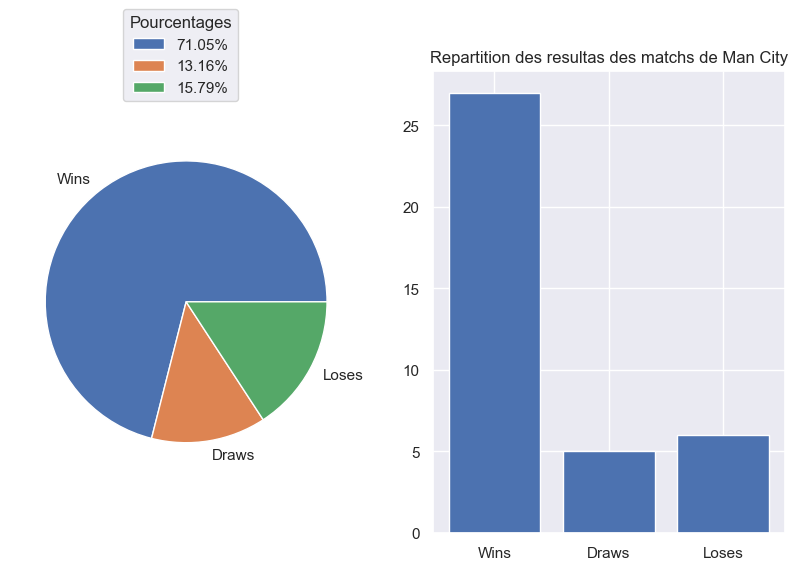

In [287]:
fig, axes = plt.subplots(1,2)
wedges, texts = axes[0].pie(x=results, labels = labels)
axes[0].legend(wedges, percentages, loc='center left', bbox_to_anchor=(0.3, 1.2), title='Pourcentages')
axes[1].bar(x=labels, height = results)
plt.title("Repartition des resultas des matchs de Man City", )
# plt.title("Nombre de victoires, defaites et match nuls")
fig.set_size_inches(10, 6)
# sns.set_palette('Set2')
sns.set_theme()

Avec ces deux graphes, on peut voir la repartition des matchs joués par Manchester City. On remarque qu'il a gagné presque 3/4 (71%) de ses matchs sur la saison 2020-2021, avec 5 matchs nuls et juste 6 defaites. Une equipe qui s'est vraiment imposé sur cette saison, d'apres les graphes.

$$\textbf{\Large Diagramme circulaire/en barre contenant le nombre}\\
\textbf{\Large de buts encaissés et marqués, à domicile comme à}\\
\textbf{\Large l'exterieur}$$

In [288]:
home_scored_goals.rename(columns={"FTHG":'HSG'}, inplace=True)
away_scored_goals.rename(columns={"FTAG":'ASG'}, inplace=True)
home_conceded_goals.rename(columns={"FTAG":'HCG'}, inplace=True)
away_conceded_goals.rename(columns={"FTHG":'ACG'}, inplace=True)

In [289]:
total_goals = [home_scored_goals, away_conceded_goals, away_scored_goals]
merged = home_conceded_goals
for goal in total_goals:
    merged = merged.merge(goal, on="Teams", how="outer")
merged.head()

,Teams,HCG,HSG,ACG,ASG
0,Arsenal,21,24,18,31
1,Aston Villa,27,29,19,26
2,Brighton,22,22,24,18
3,Burnley,27,14,28,19
4,Chelsea,18,31,18,27


In [290]:
man_city = merged.loc[merged['Teams'] == "Man City"].reset_index(drop=True)
man_city

,Teams,HCG,HSG,ACG,ASG
0,Man City,17,43,15,40


In [291]:
place = ['Home', 'Home', 'Away', 'Away']
mct_goals = man_city.values.flatten().tolist()
goal_type = ['Conceced', 'Scored', 'Conceced', 'Scored']
del(mct_goals[0])

In [292]:
ManCity = pd.DataFrame({'place':place, 'goals':mct_goals, 'type':goal_type})
ManCity

,place,goals,type
0,Home,17,Conceced
1,Home,43,Scored
2,Away,15,Conceced
3,Away,40,Scored


Text(0.5, 1.0, "Buts marqués/encaissés par Man City à domicile/l'exterieur")

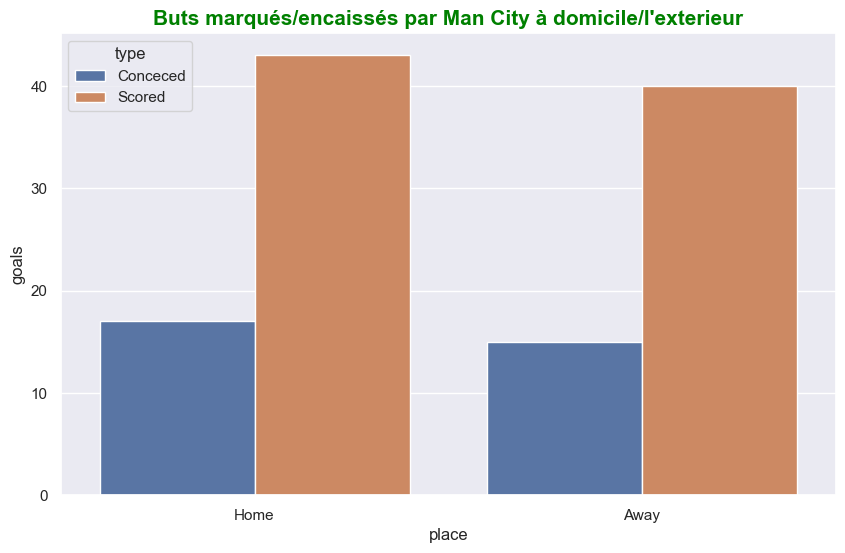

In [293]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ManCity, x='place', y='goals', hue='type')
plt.title("Buts marqués/encaissés par Man City à domicile/l'exterieur", fontname='Arial', color = 'green', fontweight = 'bold', fontsize = 15)

On remarque d'abord que cet equipe marque plus de but qu'il n'en encaisse (43 marqués contre 17 encaissés à domicile, 40 marqués contre 15 encaissés à l'exterieur), que ce soit à domicile ou a l'exterieur. On remarque aussi que le nombre de buts marqués à domicile est légèrement superieur à ceux marqués à l'exterieur (43 / 40), de même pour les buts encaissés (20 / 17). Donc pas trop de différence entre domicile et exterieur pour eux !!

$$\textbf{\Large Evolutoin du nombre de points gagnés}\\
\textbf{\Large sur chaque mois de la saison}$$

In [294]:
mcity = teams.loc[(teams['HomeTeam'] == 'Man City') | (teams['AwayTeam'] == 'Man City'), ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HST', 'AST', 'HTHG', 'HTAG']].reset_index(drop=True)
mcity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HTHG,HTAG
0,21/09/2020,Wolves,Man City,1,3,A,1,9,0,2
1,27/09/2020,Man City,Leicester,2,5,A,5,7,1,1
2,03/10/2020,Leeds,Man City,1,1,D,7,2,0,1
3,17/10/2020,Man City,Arsenal,1,0,H,5,3,1,0
4,24/10/2020,West Ham,Man City,1,1,D,2,7,1,0


Calcul du nombre de points a la fin de chaque journée

In [295]:
points_earned = []
for index, rows in mcity.iterrows():
    if (rows['HomeTeam'] == 'Man City' and rows['FTR'] == 'H') | (rows['AwayTeam'] == 'Man City' and rows['FTR'] == 'A'):
        points_earned.append(3)
    elif rows['FTR'] == 'D':
        points_earned.append(1)
    else:
        points_earned.append(0)

In [296]:
mcity['Points'] = points_earned
mcity.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HTHG,HTAG,Points
0,21/09/2020,Wolves,Man City,1,3,A,1,9,0,2,3
1,27/09/2020,Man City,Leicester,2,5,A,5,7,1,1,0
2,03/10/2020,Leeds,Man City,1,1,D,7,2,0,1,1
3,17/10/2020,Man City,Arsenal,1,0,H,5,3,1,0,3
4,24/10/2020,West Ham,Man City,1,1,D,2,7,1,0,1


In [297]:
mcity['Month'] = mcity['Date'].apply(lambda x : int(x.split('/')[1]))
mcity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HTHG,HTAG,Points,Month
0,21/09/2020,Wolves,Man City,1,3,A,1,9,0,2,3,9
1,27/09/2020,Man City,Leicester,2,5,A,5,7,1,1,0,9
2,03/10/2020,Leeds,Man City,1,1,D,7,2,0,1,1,10
3,17/10/2020,Man City,Arsenal,1,0,H,5,3,1,0,3,10
4,24/10/2020,West Ham,Man City,1,1,D,2,7,1,0,1,10


In [298]:
mcity['Month'] = pd.Categorical(mcity['Month'], categories=mcity['Month'].unique().tolist())
mcity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HTHG,HTAG,Points,Month
0,21/09/2020,Wolves,Man City,1,3,A,1,9,0,2,3,9
1,27/09/2020,Man City,Leicester,2,5,A,5,7,1,1,0,9
2,03/10/2020,Leeds,Man City,1,1,D,7,2,0,1,1,10
3,17/10/2020,Man City,Arsenal,1,0,H,5,3,1,0,3,10
4,24/10/2020,West Ham,Man City,1,1,D,2,7,1,0,1,10


In [299]:
mcity = mcity.sort_values('Month')

In [300]:
each_month = mcity.iloc[:, -2:]
each_month.head()

,Points,Month
0,3,9
1,0,9
2,1,10
3,3,10
4,1,10


In [301]:
occ = each_month['Month'].value_counts(sort=False).tolist()
# occ = occ[::-1]
occ

[2, 4, 3, 5, 6, 6, 4, 3, 5]

In [302]:
games = []
for i in occ:
    games += np.arange(1,i+1).tolist()

In [303]:
each_month['Match'] = games
each_month.head()

,Points,Month,Match
0,3,9,1
1,0,9,2
2,1,10,1
3,3,10,2
4,1,10,3


In [304]:
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
           9:'September', 10:'October', 11:'November', 12:'December'}

mcity['Month'] = mcity['Month'].apply(lambda x : months[x])
mcity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HTHG,HTAG,Points,Month
0,21/09/2020,Wolves,Man City,1,3,A,1,9,0,2,3,September
1,27/09/2020,Man City,Leicester,2,5,A,5,7,1,1,0,September
2,03/10/2020,Leeds,Man City,1,1,D,7,2,0,1,1,October
3,17/10/2020,Man City,Arsenal,1,0,H,5,3,1,0,3,October
4,24/10/2020,West Ham,Man City,1,1,D,2,7,1,0,1,October


Text(0.5, 1.05, 'Évolution du nombre de points par mois')

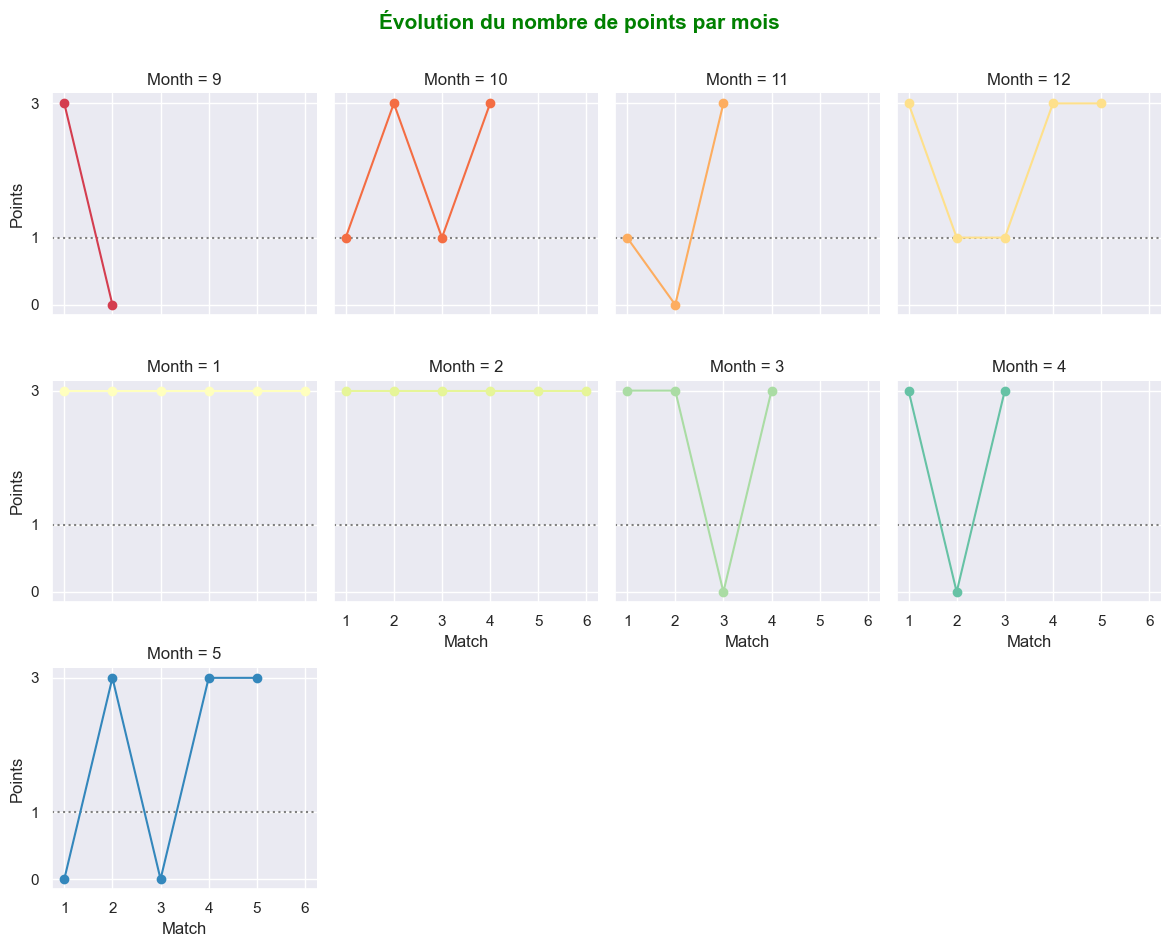

In [305]:
grid = sns.FacetGrid(each_month, col="Month", hue="Month", palette="Spectral",col_wrap=4)

grid.refline(y=1, linestyle=":")

grid.map(plt.plot, "Match", "Points", marker="o")

grid.fig.tight_layout(w_pad=1)

for ax in grid.axes.flat:
    ax.set_yticks([0, 1, 3])
    ax.set_xticks(np.arange(1, 7).tolist())

grid.fig.suptitle("Évolution du nombre de points par mois", y=1.05, fontname='Arial', color = 'green', fontweight = 'bold', fontsize = 15)

Dans ces graphes, le nombre de points correspond au nombre de matchs jouées dans ce mois. Sur l'axe des ordonnées les points gagnés et sur l'axe des abcisses le numero du match (1er, 2e etc...). Si le graphe est en dessous de ma ligne en pointillées (c'est à dire 0 point), c'est une defaite. Si le point est sur la ligne (1 point), c'est un match nul et si c'est es au dessus (3 points) c'est une victoire.  
On peut ainsi remarquer Man City n'as de defaite sur les mois Octobre, Decembre, Janvier et Fevrier. Ils enchainent ainsi 16 victoires in a row (a partir du 4e match du mois de decembre jusqu'au 2e match du mois de Mars).  
Le mois où il ont plus de defaites est le mois de Mai (2 defaites)


$$\textbf{\Large Doites de regression linéaire des nombres de buts,}\\
\textbf{\Large en fonction des tirs cadrés dans chaque mois}$$

In [306]:
mcity_shots = mcity.iloc[:,1:8]
mcity_shots.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST
0,Wolves,Man City,1,3,A,1,9
1,Man City,Leicester,2,5,A,5,7
2,Leeds,Man City,1,1,D,7,2
3,Man City,Arsenal,1,0,H,5,3
4,West Ham,Man City,1,1,D,2,7


In [307]:
on_target = []
inside = []
for index, rows in mcity_shots.iterrows():
    on_target.append(rows['HST'] if (rows['HomeTeam'] == 'Man City') else rows['AST'])
    inside.append(rows['FTHG'] if (rows['HomeTeam'] == 'Man City') else rows['FTAG'])
mcity_shots['OnTarget'] = on_target
mcity_shots['Goals'] = inside
mcity_shots.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,OnTarget,Goals
0,Wolves,Man City,1,3,A,1,9,9,3
1,Man City,Leicester,2,5,A,5,7,5,2
2,Leeds,Man City,1,1,D,7,2,2,1
3,Man City,Arsenal,1,0,H,5,3,5,1
4,West Ham,Man City,1,1,D,2,7,7,1


In [308]:
efficiency = mcity_shots.iloc[:,-2:]
efficiency['Month'] = mcity['Month']
efficiency.head()

,OnTarget,Goals,Month
0,9,3,September
1,5,2,September
2,2,1,October
3,5,1,October
4,7,1,October


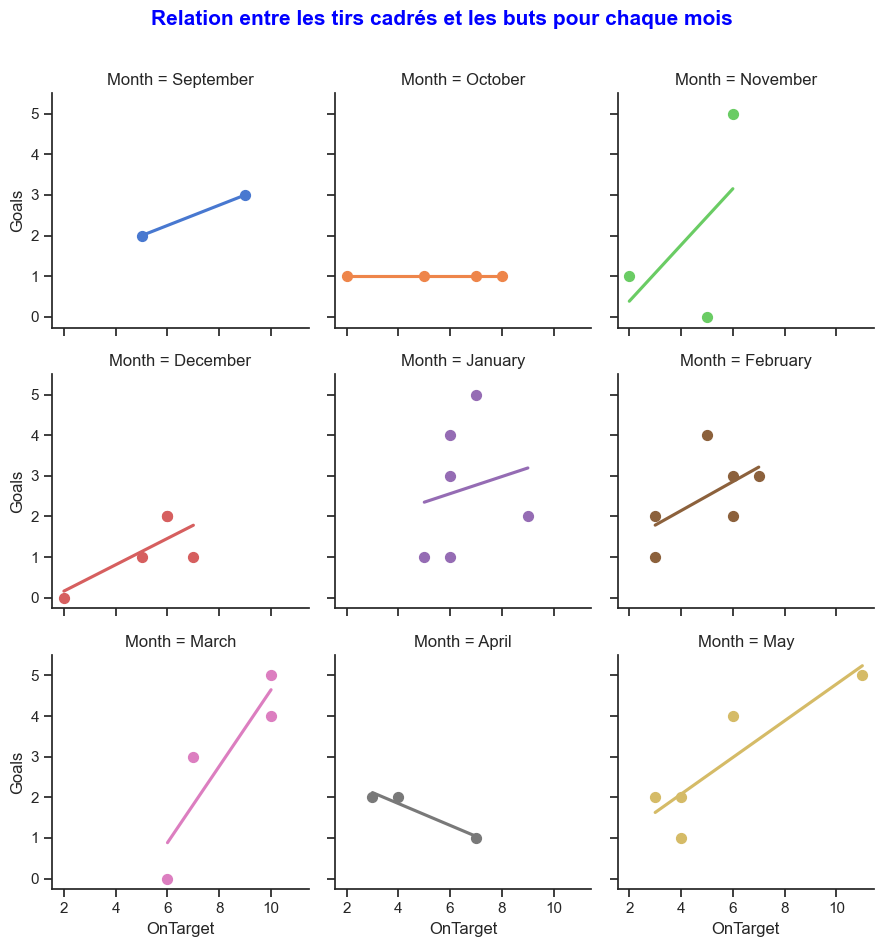

In [309]:
sns.set_theme(style="ticks")

graph = sns.lmplot(
    data=efficiency, x="OnTarget", y="Goals", col="Month", hue="Month",
    col_wrap=3, palette="muted", ci=None,
    height=3, scatter_kws={"s": 50, "alpha": 1}
)
graph.fig.suptitle("Relation entre les tirs cadrés et les buts pour chaque mois", y=1.05, fontname='Arial', color = 'blue', fontweight = 'bold', fontsize = 15)
plt.show()

Affichons les pentes de chaque droite de regression

In [310]:
axes = graph.axes.flatten()

# Parcourir chaque sous-graphique et ajuster une ligne de régression
for ax,month in zip(axes, efficiency['Month'].unique().tolist()):
    data = ax.collections[0].get_offsets()  # Récupérer les données du nuage de points
    x = data[:, 0]
    y = data[:, 1]
    coeffs = np.polyfit(x, y, deg=1)  # Ajuster une ligne de régression d'ordre 1
    slope = coeffs[0]  # Récupérer la pente de la ligne de régression
    print(f"{month:} => {slope:.2f}")

September => 0.25
October => -0.00
November => 0.69
December => 0.32
January => 0.21
February => 0.36
March => 0.94
April => -0.27
May => 0.45


Dans l'ensemble, on peut dire qu'on a une relation positive entre les tirs cadrés et le nombre de buts d'apres les graphes.  
Si on prend par exemple le mois de Mars, la pente de 0.94 peut interprété de la suite: une augmentation de 1 unité dans le nombre de tirs cadrés est associée à une augmentation de 0.94 unité dans le nombre de buts marqués. Cela suggère une relation positive très forte entre les deux variablesn sur ce mois.  
Ce qui n'est pas le cas avec le mois d'Octobre où y a pas de relation significative entre le nombre de tirs cadrés et le nombre de buts marqués. La pente est egale à 0, ce qui indique une absence de corrélation linéaire.  
- Si les points sont regroupés de manière étroite autour de la droite de régression, cela indique une bonne adéquation entre les tirs cadrés et les buts marqués. Cela suggère que la relation linéaire est assez forte et que les tirs cadrés sont un bon prédicteur du nombre de buts marqués.

- Si les points sont dispersés de manière plus large autour de la droite de régression, cela indique une plus grande variabilité dans la relation entre les tirs cadrés et les buts marqués. Cela peut être dû à d'autres facteurs influençant les performances de l'équipe, tels que la qualité des adversaires, les tactiques de jeu, etc.

- Si certains points sont éloignés de la droite de régression, cela peut indiquer des observations atypiques ou des cas particuliers où la relation entre les tirs cadrés et les buts marqués diffère considérablement de la tendance générale. Ces points peuvent nécessiter une attention supplémentaire pour comprendre les raisons de leur écart par rapport à la relation linéaire attendue.

$$\textbf{\Large Histogrammes (facetting histograms)}\\
\textbf{\Large representant le nombre de fois où Man City}\\
\textbf{\Large a marqué avant la mi-temps, a domicile comme}\\
\textbf{\Large a l'exterieur, quand il s'agit d'une victoire,}\\
\textbf{\Large defaite ou match nul}$$

In [311]:
mcity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HTHG,HTAG,Points,Month
0,21/09/2020,Wolves,Man City,1,3,A,1,9,0,2,3,September
1,27/09/2020,Man City,Leicester,2,5,A,5,7,1,1,0,September
2,03/10/2020,Leeds,Man City,1,1,D,7,2,0,1,1,October
3,17/10/2020,Man City,Arsenal,1,0,H,5,3,1,0,3,October
4,24/10/2020,West Ham,Man City,1,1,D,2,7,1,0,1,October


In [312]:
mcity_ht = mcity.loc[:,['HomeTeam', 'AwayTeam', 'FTR', 'FTHG', 'FTAG', 'HTHG', 'HTAG']]
mcity_ht.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG
0,Wolves,Man City,A,1,3,0,2
1,Man City,Leicester,A,2,5,1,1
2,Leeds,Man City,D,1,1,0,1
3,Man City,Arsenal,H,1,0,1,0
4,West Ham,Man City,D,1,1,1,0


In [313]:
home_away = []
for index,row in mcity_ht.iterrows():
    home_away.append("Home" if (row['HomeTeam'] == 'Man City') else "Away")
mcity_ht['Place'] = home_away
mcity_ht.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,Place
0,Wolves,Man City,A,1,3,0,2,Away
1,Man City,Leicester,A,2,5,1,1,Home
2,Leeds,Man City,D,1,1,0,1,Away
3,Man City,Arsenal,H,1,0,1,0,Home
4,West Ham,Man City,D,1,1,1,0,Away


In [314]:
wdl = []
for index,row in mcity_ht.iterrows():
    if (row['HomeTeam'] == 'Man City' and row['FTR'] == "H") | (row['AwayTeam'] == 'Man City' and row['FTR'] == "A"):
        wdl.append("Win")
    elif (row['HomeTeam'] == 'Man City' and row['FTR'] == "A") | (row['AwayTeam'] == 'Man City' and row['FTR'] == "H"):
        wdl.append("Lose")
    else:
        wdl.append("Draw")
mcity_ht['Result'] = wdl
mcity_ht.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,Place,Result
0,Wolves,Man City,A,1,3,0,2,Away,Win
1,Man City,Leicester,A,2,5,1,1,Home,Lose
2,Leeds,Man City,D,1,1,0,1,Away,Draw
3,Man City,Arsenal,H,1,0,1,0,Home,Win
4,West Ham,Man City,D,1,1,1,0,Away,Draw


In [315]:
half = []
for index,row in mcity_ht.iterrows():
    half.append("Yes" if (row['HomeTeam'] == 'Man City' and row['HTHG'] != 0) | (row['AwayTeam'] == 'Man City' and row['HTAG'] != 0) else "No")
mcity_ht['SoredHalf'] = half
mcity_ht.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,Place,Result,SoredHalf
0,Wolves,Man City,A,1,3,0,2,Away,Win,Yes
1,Man City,Leicester,A,2,5,1,1,Home,Lose,Yes
2,Leeds,Man City,D,1,1,0,1,Away,Draw,Yes
3,Man City,Arsenal,H,1,0,1,0,Home,Win,Yes
4,West Ham,Man City,D,1,1,1,0,Away,Draw,No


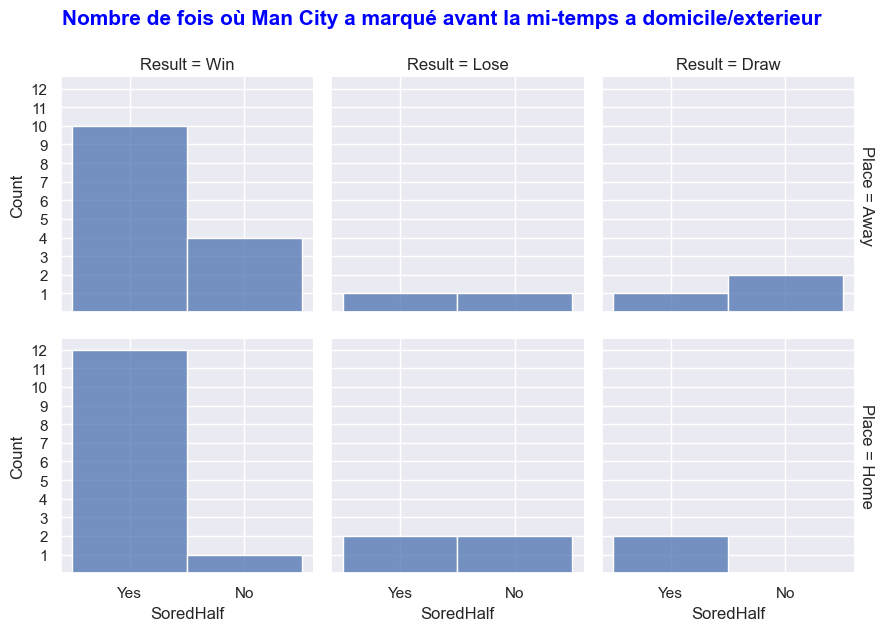

In [316]:
sns.set_theme(style="darkgrid")
hists = sns.displot(
    mcity_ht, x="SoredHalf", col="Result", row="Place",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)
for ax in hists.axes.flat:
    ax.set_yticks(np.arange(1, 13).tolist())

hists.fig.suptitle("Nombre de fois où Man City a marqué avant la mi-temps a domicile/exterieur", y=1.05, fontname='Arial', color = 'blue', fontweight = 'bold', fontsize = 15)
plt.show()

Dans ce graphe, on a representé le nombre de fois que Man City a marqué avant la mi-temps, a domicili comme a l'exterieur, quand c'est une victoire, defaite ou match nul.  
- on peut voir que quand ils gagnent un match, la plupart du temps ils marquent avant la mi-temps:  
- 10 matchs a domicilie (contre 4) où ils marqué a la mi-temps
- 12 matchs a l'exterieur (contre 1 seul) où ils marqué a la mi-temps 
- Une repartition plutot equilibré quand il s'agit d'une defaite
- Pour chaque match nul a domicile ils ont marqués avant la mi-temps

Ces graphes nous montrent que cet equipe marque beaucoup avant la mi-temp

$$\textbf{\LARGE THE END 🎲✅🎯}\\